## About this task


####  The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.
#### The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.


### BigMart Sales Prediction practice problem

- We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

- Item_Identifier: Unique product ID

- Item_Weight: Weight of product

- Item_Fat_Content: Whether the product is low fat or not

- Item_Visibility: The % of total display area of all products in a store allocated to the particular product

- Item_Type: The category to which the product belongs

- Item_MRP: Maximum Retail Price (list price) of the product

- Outlet_Identifier: Unique store ID

- Outlet_Establishment_Year: The year in which store was established

- Outlet_Size: The size of the store in terms of ground area covered

- Outlet_Location_Type: The type of city in which the store is located

- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted

# Loading structure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# Reading training data

In [2]:
df1 = pd.read_csv("/kaggle/input/bigmart-sales-data/Train.csv")
df2=pd.read_csv("/kaggle/input/bigmart-sales-data/Test.csv")

## Data structure and content

In [3]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [4]:
df1.shape

(8523, 12)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
(df1.isnull().sum() / len(df1)) * 100


Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
# check for duplicated values
df1.duplicated().sum()

0

In [9]:
df1.Item_Weight.fillna(df1.Item_Weight.mean(),inplace=True)

## Treatment of missing values for Item_Weight & Outlet_Size 
- Categoral data can be filled with mode
- Numerical data can be filled with mean

In [10]:
mode_of_outlet_size = df1.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode()[0])

In [11]:
mode_of_outlet_size

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [12]:
# Fill missing values in 'Outlet Size' using the mode of 'Outlet Type'
df1['Outlet_Size'] = df1.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.fillna(x.mode()[0]))

In [13]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data correction for Item_Fat_Content

In [14]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [15]:
df1.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"})

## EDA:
- Univariate Exploration
- Bivariate  Exploratioj

## Univariate Exploration

In [17]:
# Distribution of Item Weight

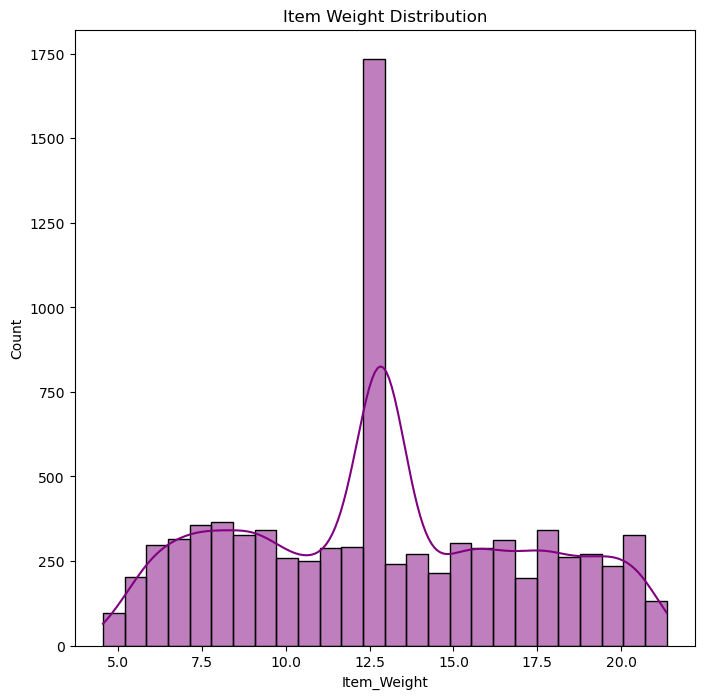

In [18]:
plt.figure(figsize=(8,8))
plt.title("Item Weight Distribution")
sns.histplot(data=df1, x='Item_Weight', kde=True, color = 'purple')
plt.show()

In [19]:
df1.Item_Weight.value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64

<AxesSubplot:xlabel='Item_Weight'>

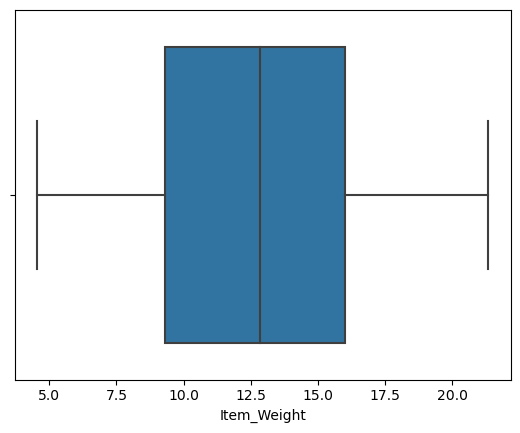

In [20]:
import seaborn as sns

sns.boxplot(x=df1['Item_Weight'])

In [21]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


<AxesSubplot:xlabel='Item_Visibility'>

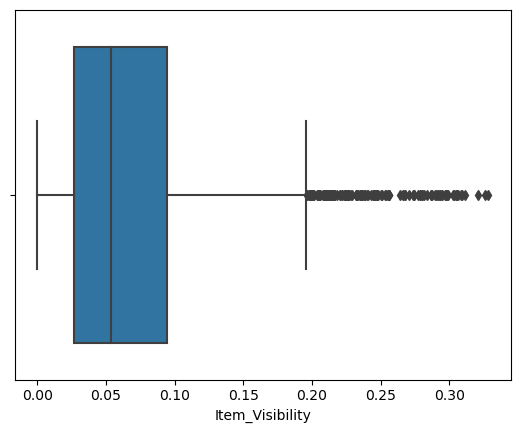

In [22]:
sns.boxplot(x=df1['Item_Visibility'])

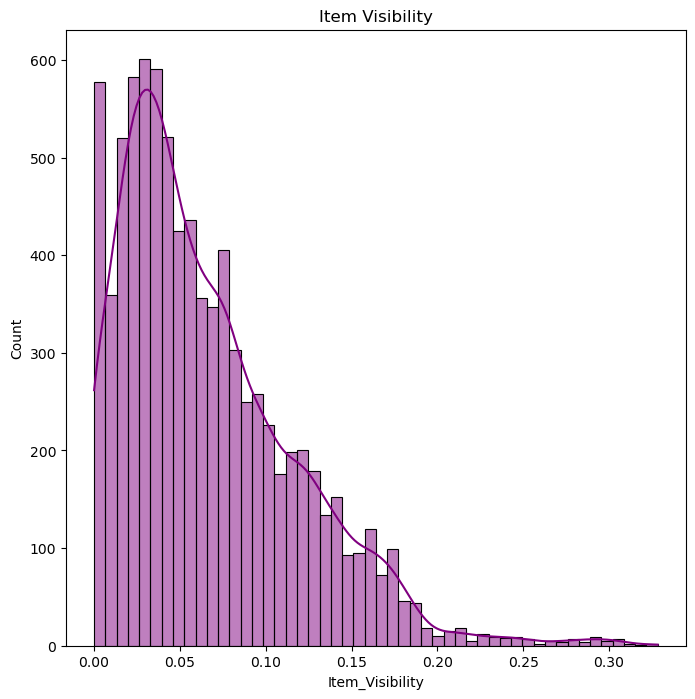

In [23]:
plt.figure(figsize=(8,8))
plt.title("Item Visibility")
sns.histplot(data=df1, x='Item_Visibility', kde=True, color = 'purple')
plt.show()

In [24]:
from scipy import stats

z_scores = stats.zscore(df1['Item_Visibility'])
outliers = (z_scores > 3) | (z_scores < -3)
outlier_values = df1['Item_Visibility'][outliers]
outlier_values.shape 

(95,)

In [25]:
df1 = df1[~df1['Item_Visibility'].isin(outlier_values)]

<AxesSubplot:xlabel='Item_Weight'>

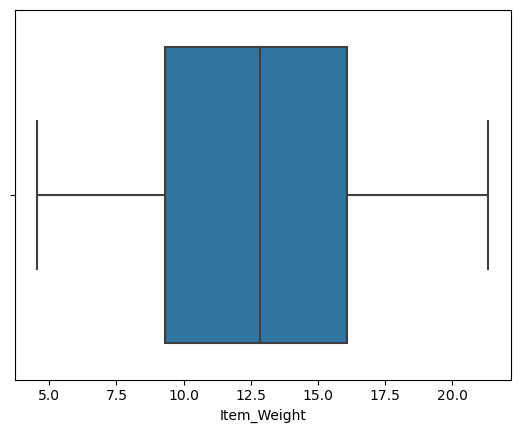

In [26]:
sns.boxplot(x=df1['Item_Weight'])

### From the above plot we can observe that a lot of items have a weight of 12.5

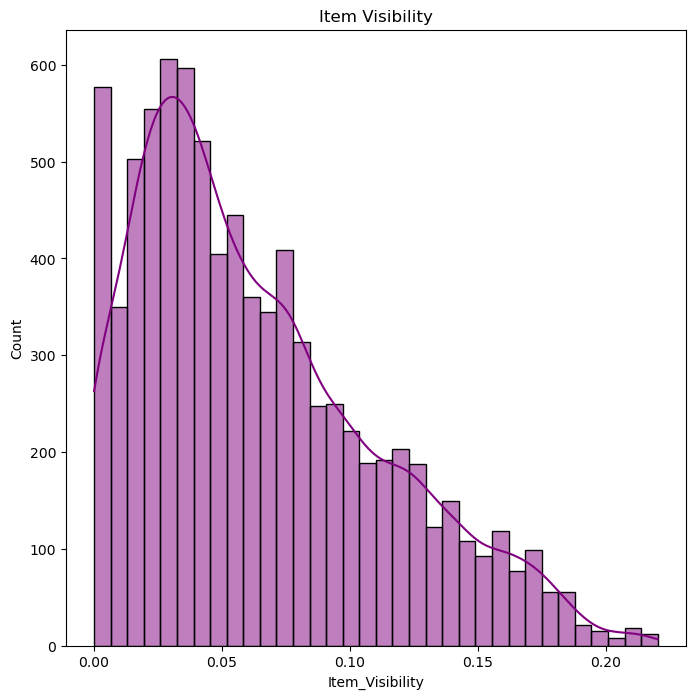

In [27]:
plt.figure(figsize=(8,8))
plt.title("Item Visibility")
sns.histplot(data=df1, x='Item_Visibility', kde=True, color = 'purple')
plt.show()

In [28]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [29]:
df1.shape

(8428, 12)

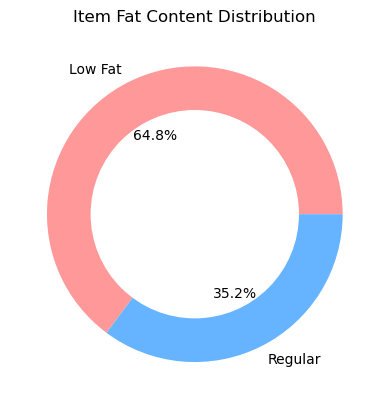

In [30]:
import matplotlib.pyplot as plt


fat_content_counts = df1['Item_Fat_Content'].value_counts()
labels = fat_content_counts.index
sizes = fat_content_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
circle = plt.Circle((0, 0), 0.7, color='White')
ax.add_artist(circle)
plt.title('Item Fat Content Distribution')
plt.show()

### we can see that we have more items from low fat category rather than regular

In [31]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


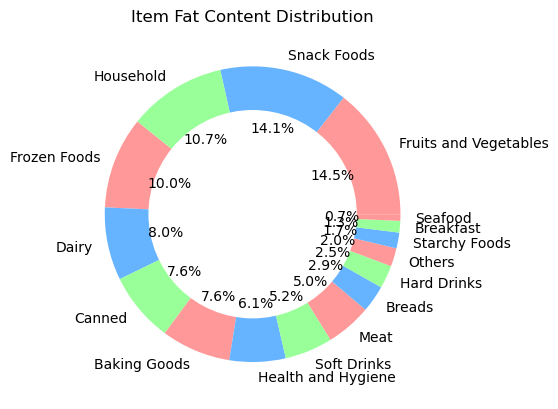

In [32]:
Item_Type = df1['Item_Type'].value_counts()
labels = Item_Type.index
sizes = Item_Type.values
colors = ['#ff9999', '#66b3ff', '#99ff99']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
circle = plt.Circle((0, 0), 0.7, color='White')
ax.add_artist(circle)
plt.title('Item Fat Content Distribution')
plt.show()# From the plot it is evident that majority of the items have visibility less than 0.20

In [33]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [34]:
grouped = df1.groupby('Item_Type')

for group, items in grouped:
    print(f"Group: {group}")
    print(items['Item_Identifier'])
    print()

Group: Baking Goods
5       FDP36
21      FDW12
23      FDC37
48      FDL12
71      FDL12
        ...  
8435    FDT48
8441    FDK60
8465    FDX11
8515    FDH24
8519    FDS36
Name: Item_Identifier, Length: 640, dtype: object

Group: Breads
33      FDO23
114     FDV11
124     FDW11
169     FDW11
175     FDR47
        ...  
8198    FDR59
8240    FDQ47
8334    FDW59
8370    FDV23
8413    FDW59
Name: Item_Identifier, Length: 248, dtype: object

Group: Breakfast
15      FDP49
17      FDP49
87      FDQ49
157     FDN13
264     FDN01
        ...  
8136    FDR37
8222    FDL13
8303    FDO37
8317    FDN13
8335    FDO49
Name: Item_Identifier, Length: 107, dtype: object

Group: Canned
29      FDC14
43      FDC02
44      FDL50
47      FDV49
52      FDR13
        ...  
8438    FDE26
8449    FDG02
8455    FDL26
8489    FDV13
8514    FDA01
Name: Item_Identifier, Length: 644, dtype: object

Group: Dairy
0       FDA15
11      FDA03
19      FDU02
28      FDE51
30      FDV38
        ...  
8424    FDC39
8447

The information contaions in Colum item idetifier have alredy coverd in as per the above information we can drop the colum Item idetifier

In [35]:
df1.Item_Identifier.value_counts().head(100)

FDW13    10
FDX04     9
NCI54     9
FDU12     9
FDV38     9
         ..
NCV41     8
NCY29     8
NCX29     8
FDA04     8
FDT49     8
Name: Item_Identifier, Length: 100, dtype: int64

In [36]:
grouped = df1.groupby('Item_Fat_Content')

for group, items in grouped:
    print(f"Group: {group}")
    print(items['Item_Identifier'])
    print()

Group: Low Fat
0       FDA15
2       FDN15
4       NCD19
7       FDP10
10      FDY07
        ...  
8515    FDH24
8516    NCJ19
8518    FDF22
8520    NCJ29
8522    DRG01
Name: Item_Identifier, Length: 5463, dtype: object

Group: Regular
1       DRC01
3       FDX07
5       FDP36
6       FDO10
8       FDH17
        ...  
8513    FDH31
8514    FDA01
8517    FDF53
8519    FDS36
8521    FDN46
Name: Item_Identifier, Length: 2965, dtype: object



In [37]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [38]:
grouped = df1.groupby('Item_Fat_Content')

for group, items in grouped:
    print(f"Group: {group}")
    print(items['Item_Type'])
    print()

Group: Low Fat
0                       Dairy
2                        Meat
4                   Household
7                 Snack Foods
10      Fruits and Vegetables
                ...          
8515             Baking Goods
8516                   Others
8518              Snack Foods
8520       Health and Hygiene
8522              Soft Drinks
Name: Item_Type, Length: 5463, dtype: object

Group: Regular
1                 Soft Drinks
3       Fruits and Vegetables
5                Baking Goods
6                 Snack Foods
8                Frozen Foods
                ...          
8513                     Meat
8514                   Canned
8517             Frozen Foods
8519             Baking Goods
8521              Snack Foods
Name: Item_Type, Length: 2965, dtype: object

